 # Loading Data from a File

 This example shows how to load data from a file into a Stream object. These
 are usufull for doing some automated analysis, but you can just pull
 data from a file and do whatever you want with it.

 ## Working path

 Set the working path where the data is stored. For now we'll use the
 provided example data in this current directory.

 But the path could be any where on your computer. For example, if you have a
 folder called "data" in your home directory, you could set the path to:
 `path = "U:\\data\\processing\\Campgain2023_of_aswsome\\data"`

In [1]:
# all the imports, but we'll go through them one by one as we use them
import os
import matplotlib.pyplot as plt
from datacula import loader
from datacula import loader_interface, settings_generator
from datacula.test.data.get_example_data import get_data_folder

In [ ]:
# set the parent directory of the data folder, for now this is the same as the
# current working directory, but this can be a completely different path
#
# imports os to get the current working directory
import os
from datacula.test.data.get_example_data import get_data_folder

current_path = os.getcwd()
print('Current path for this script:')
print(current_path)

path = get_data_folder()
print('Path to data folder:')
print(path)

# Load the data

 With the working directory set, we can now load the data. For this we use
 the `loader` module and call loader.data_raw_loader() with the file path as
 argument.

In [ ]:
data_file = os.path.join(
    path,
    'CPC_3010_data',
    'CPC_3010_data_20220709_Jul.csv')

# print the file path
print(data_file)

# load the data
raw_data = loader.data_raw_loader(data_file)

# print the first 2 rows
print(raw_data[:2])

# Clean up the data
 Now we can apply some data checks that we defined in the settings dictionary.
 For this we use `loader.data_format_checks` and then we can convert that list
  of strings to a numpy array.

 To do that next step we call `loader.sample_data()` with inputs from the
 settings dictionary and the data list we just cleaned up.

 The data checks are:
 - characters: the min and max number of characters in each line of data
 - char_counts: the number of times a character should appear in each line
               of data, This is a dictionary with the character as the key
               and the number of times it should appear as the value
 - skip_rows: the number of rows to skip at the beginning of the file
 - skip_end: the number of rows to skip at the end of the file

 Then returned is a filtered list of data that passes the checks.

In [4]:
# This is done by the general_data_formatter function for timeseries data
# 2d data is a separate function

print(f"raw_data length: {len(raw_data)}")

data = loader.data_format_checks(
    data=raw_data,
    data_checks={
        "characters": [10, 100],
        "char_counts": {",": 4},  # this can be anything "adsf": 10
        "skip_rows": 0,
        "skip_end": 0
        }
    )

print(f"data length: {len(data)}")
print(f"There was {len(raw_data) - len(data)} lines removed from the data")

raw_data length: 33280
data length: 33254
There was 26 lines removed from the data


 ## Data and Time

 Now that the data is cleaned up, we can get the time and data columns from
 the cleaned data. For this we use the `loader.sample_data()` function.

In [5]:
# Sample the data to get the epoch times and the data
epoch_time, data_array = loader.sample_data(
    data=data,
    time_column=[0],  # column that has the time data if you need to combine
                      # multiple columns, you can do that here by passing
                      # a list of columns, for example [0, 2]
    time_format="epoch",  # this can also be "%m/%d/%Y %I:%M:%S %p" or any
                          # format that datetime.strptime() can handle
    data_columns=[1, 2],  # columns that have the data
    delimiter=",",
)


print(f"epoch_time shape: {epoch_time.shape}")
print(epoch_time[:5])
print(f"data_array shape: {data_array.shape}")
print(data_array[:5])

epoch_time shape: (33254,)
[1.65734280e+09 1.65734281e+09 1.65734281e+09 1.65734281e+09
 1.65734282e+09]
data_array shape: (33254, 2)
[[3.3510e+04 1.7000e+01]
 [3.3465e+04 1.7100e+01]
 [3.2171e+04 1.7000e+01]
 [3.2889e+04 1.6800e+01]
 [3.2706e+04 1.7000e+01]]


 ## Pause to Plot

 Now that we have the data and time, we can plot it to see what it looks like.

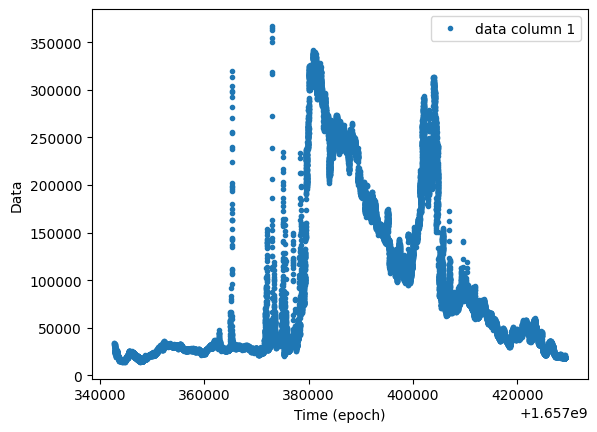

In [6]:
# plot the data
fig, ax = plt.subplots()
ax.plot(epoch_time,
        data_array[:, 0],
        label="data column 1",
        linestyle="none",
        marker=".",)
ax.set_xlabel("Time (epoch)")
ax.set_ylabel("Data")
ax.legend()
plt.show()
fig.tight_layout()

 # Stream Object

 Now you can stop here, and do whatever you want with the data. But if you
 want copy and pasting, that code over and over again, can get tedious. So
 instead we can use the `Stream` object to do some automated analysis.

 Those settings then can be collected as a dictionary and passed to the loader
 function to load the data into a `Stream` object.

 We'll get to the stream object later, but for now we'll just show how to load
 using the settings dictionary.

 ## Settings dictionary

 The settings dictionary is a dictionary that contains all the settings for
 loading the data. This includes the data checks, the time and data columns,
 and the time format.

 There are two ways to generate the settings dictionary. The first is to use
 the `settings_generator` module and call the `for_1d_general_file()` function
 with the settings you want. The second is to manually create the dictionary
 yourself.

In [7]:
# This method uses the settings_generator module to generate the settings.

from datacula import settings_generator

# lets repeat the same import from above

settings = settings_generator.for_general_1d_load(
    relative_data_folder='CPC_3010_data',
    filename_regex='*.csv',
    file_MIN_SIZE_BYTES=10,
    data_checks={
        "characters": [10, 100],
        "char_counts": {",": 4},
        "skip_rows": 0,
        "skip_end": 0,
    },
    data_column=[1, 2],
    data_header=['data 1', 'data 2'],
    time_column=[0],
    time_format='epoch',
    delimiter=',',
    Time_shift_seconds=0,
    timezone_identifier='UTC',
)

# print and format the settings dictionary
print('Settings dictionary:')
for key, value in settings.items():
    print(f'{key}: {value}')

Settings dictionary:
relative_data_folder: CPC_3010_data
filename_regex: *.csv
MIN_SIZE_BYTES: 10
data_loading_function: general_1d_load
data_checks: {'characters': [10, 100], 'char_counts': {',': 4}, 'skip_rows': 0, 'skip_end': 0}
data_column: [1, 2]
data_header: ['data 1', 'data 2']
time_column: [0]
time_format: epoch
delimiter: ,
Time_shift_seconds: 0
timezone_identifier: UTC


 ## Load the data with the interface

 Now that we have the settings dictionary, we can use an interface
 that will take the settings and locations and do all those steps from above.
 Calling the relevant functions.

In [8]:
# import the interface
from datacula import loader_interface

working_path = get_data_folder()

# copied from above,
# or you could just say cpc_setting=settings_generator.for_1d_general_file(...)
cpc_settings = {
    'relative_data_folder': 'CPC_3010_data',
    'filename_regex': '*.csv',
    'MIN_SIZE_BYTES': 10,
    'data_loading_function':'general_1d_load',
    'data_checks': {'characters': [
            10,
            100],
        'char_counts': {
            ',': 4},
        'skip_rows': 0,
        'skip_end': 0},
    'data_column': [
        1,
        2],
    'data_header': [
        'data 1',
        'data 2'],
    'time_column': [0],
    'time_format': 'epoch',
    'delimiter': ',',
    'Time_shift_seconds': 0,
    'timezone_identifier': 'UTC'}

# no call the loader interface
data_stream = loader_interface.load_files_interface(
    path=working_path,
    settings=cpc_settings,
)

Loading data from: CPC_3010_data_20220709_Jul.csv
Loading data from: CPC_3010_data_20220710_Jul.csv


In [9]:
# print data stream summary
print('Stream:')
print(data_stream)

Stream:
Stream(header=['data 1', 'data 2'], data=array([[3.3510e+04, 3.3465e+04, 3.2171e+04, ..., 1.9403e+04, 2.0230e+04,
        1.9521e+04],
       [1.7000e+01, 1.7100e+01, 1.7000e+01, ..., 1.6900e+01, 1.7000e+01,
        1.6800e+01]]), time=array([1.65734280e+09, 1.65734281e+09, 1.65734281e+09, ...,
       1.65751559e+09, 1.65751560e+09, 1.65751560e+09]), files=[['CPC_3010_data_20220709_Jul.csv', 1044534], ['CPC_3010_data_20220710_Jul.csv', 1113488]])


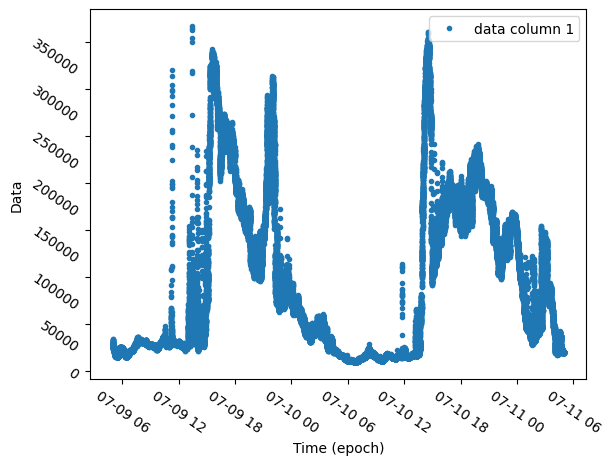

In [10]:
# plot the data
fig, ax = plt.subplots()
ax.plot(data_stream.datetime64,
        data_stream.data[0, :],  # data_stream.data is a 2d array, so we need
                                 # to specify which column we want to plot
        label="data column 1",
        linestyle="none",
        marker=".",)
plt.tick_params(rotation=-35)
ax.set_xlabel("Time (epoch)")
ax.set_ylabel("Data")
ax.legend()
plt.show()
fig.tight_layout()